# CS 524 HW5

## Question 1a

In [1]:
using NamedArrays, CSV, DataFrames, JuMP, Clp, LinearAlgebra

raw = CSV.read("stigler.csv", DataFrame);
(m,n) = size(raw)
n_nutrients = 2:n
n_foods = 3:m
foods = raw[2:end,1]
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )
dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))

stigler = Model(with_optimizer(Clp.Optimizer))

@variable(stigler, x[foods] >= 0)
@constraint(stigler, y[j in nutrients], sum( data[i,j]*x[i] for i in foods ) >= lower[j] )
@objective(stigler, Min, sum(x))

optimize!(stigler)
xopt = JuMP.value.(x)
println("The diet cost per year = \$", objective_value(stigler)*365)
println("The amount of each food: ")
for i in foods
    if xopt[i] > 0
        println("    ", i, " -> ", xopt[i])
    end
end
println()

The diet cost per year = $39.66173154546625
The amount of each food: 
    Wheat Flour (Enriched) -> 0.02951906167648827
    Liver (Beef) -> 0.0018925572907052643
    Cabbage -> 0.011214435246144865
    Spinach -> 0.005007660466725203
    Navy Beans, Dried -> 0.061028563526693246

Coin0506I Presolve 9 (0) rows, 76 (-1) columns and 569 (-1) elements
Clp0006I 0  Obj 0 Primal inf 5.1310537 (9)
Clp0006I 6  Obj 0.10866228
Clp0000I Optimal - objective value 0.10866228
Coin0511I After Postsolve, objective 0.10866228, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.1086622782 - 6 iterations time 0.002, Presolve 0.00


In [2]:
calcium_price = getdual(y["Calcium (g)"]) / 2
println("The price of calcium is \$", calcium_price, " per 500mg pill.")

The price of calcium is $0.015868856722818517 per 500mg pill.


## Question 1b

In [13]:
using NamedArrays, CSV, DataFrames, JuMP, Clp, LinearAlgebra

# 500mg in a pill and $0.01 for 1 pill => 50g in $1 worth of pills
# update data
raw2 = CSV.read("stigler_new.csv", DataFrame);
(m2,n2) = size(raw2)
n_nutrients2 = 2:n2
n_foods2 = 3:m2
foods2 = raw2[2:end,1]
nutrients2 = [string(names(raw2)[i]) for i=2:length(names(raw2))]
lower2 = Dict( zip(nutrients2,raw2[1,n_nutrients2]) )
dataraw2 = Matrix(values(raw2[2:end,2:end]))
data2 = NamedArray(dataraw2,(foods2,nutrients2),("foods","nutrients"))

new_stigler = Model(with_optimizer(Clp.Optimizer))

@variable(new_stigler, x[foods2] >= 0)
@constraint(new_stigler, y[j in nutrients2], sum( data2[i,j]*x[i] for i in foods2 ) >= lower2[j] )
@objective(new_stigler, Min, sum(x))

optimize!(new_stigler)
xopt = JuMP.value.(x)
println("The diet cost per year = \$", objective_value(new_stigler)*365)
println("The amount of each food: ")
for i in foods2
    if xopt[i] > 0
        println("    ", i, " -> ", xopt[i])
    end
end
println()

The diet cost per year = $36.9982473745081
The amount of each food: 
    Wheat Flour (Enriched) -> 0.06598060307911847
    Liver (Beef) -> 0.00784433892120114
    Cabbage -> 0.011195027632464827
    Spinach -> 0.003911295356684479
    Calcium supplement  -> 0.012433796310553268

Coin0506I Presolve 9 (0) rows, 77 (-1) columns and 570 (-1) elements
Clp0006I 0  Obj 0 Primal inf 4.7027054 (9)
Clp0006I 5  Obj 0.10136506
Clp0000I Optimal - objective value 0.10136506
Coin0511I After Postsolve, objective 0.10136506, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.1013650613 - 5 iterations time 0.002, Presolve 0.00


With the calcium supplement, we have a lower diet cost

## Question 2a

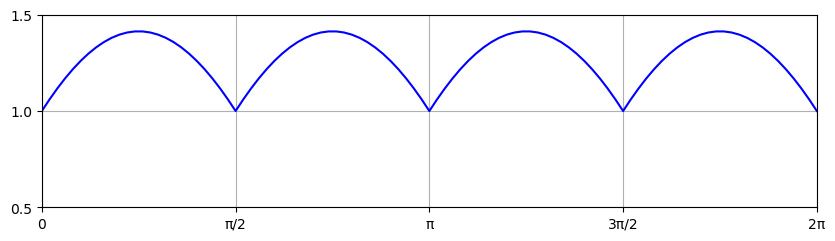

Coin0506I Presolve 0 (-2) rows, 0 (-4) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 1
Coin0511I After Postsolve, objective 1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1 - 0 iterations time 0.002, Presolve 0.00
Coin0506I Presolve 0 (-2) rows, 0 (-4) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 1.0608172
Coin0511I After Postsolve, objective 1.0608172, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1.060817248 - 0 iterations time 0.002, Presolve 0.00
Coin0506I Presolve 0 (-2) rows, 0 (-4) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 1.1174479
Coin0511I After Postsolve, objective 1.1174479, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1.117447935 - 0 iterations time 0.002, Presolve 0.00
Coi

In [44]:
using JuMP, PyPlot, Clp

SIZE = 101
intervals = range(0,2π,SIZE)
outputs = zeros(SIZE)

for (i,t) in enumerate(intervals)
    m_dual = Model(with_optimizer(Clp.Optimizer))
    @variable(m_dual, p >= 0)
    @variable(m_dual, q >= 0)
    @variable(m_dual, r >= 0)
    @variable(m_dual, s >= 0)
    
    @constraint(m_dual, p - r == cos(t))
    @constraint(m_dual, q - s == sin(t))
    
    @objective(m_dual, Min, p + q + r + s)
    
    optimize!(m_dual)
    outputs[i] = getobjectivevalue(m_dual);
end

figure(figsize=(10,2.5))
plot(intervals, outputs, "b-")
xticks(0:π/2:2π)
yticks(0:0.5:1.5)
ylim([0.5,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
;

## Question 2b
$$ \text{maximize     } x \cdot cos(t) + y \cdot sin(t) $$
$$ \text{subject to   } -1 \le x \le 1 $$
$$ \text{             } -1 \le y \le 1 $$

It does satisfy the optimal object above
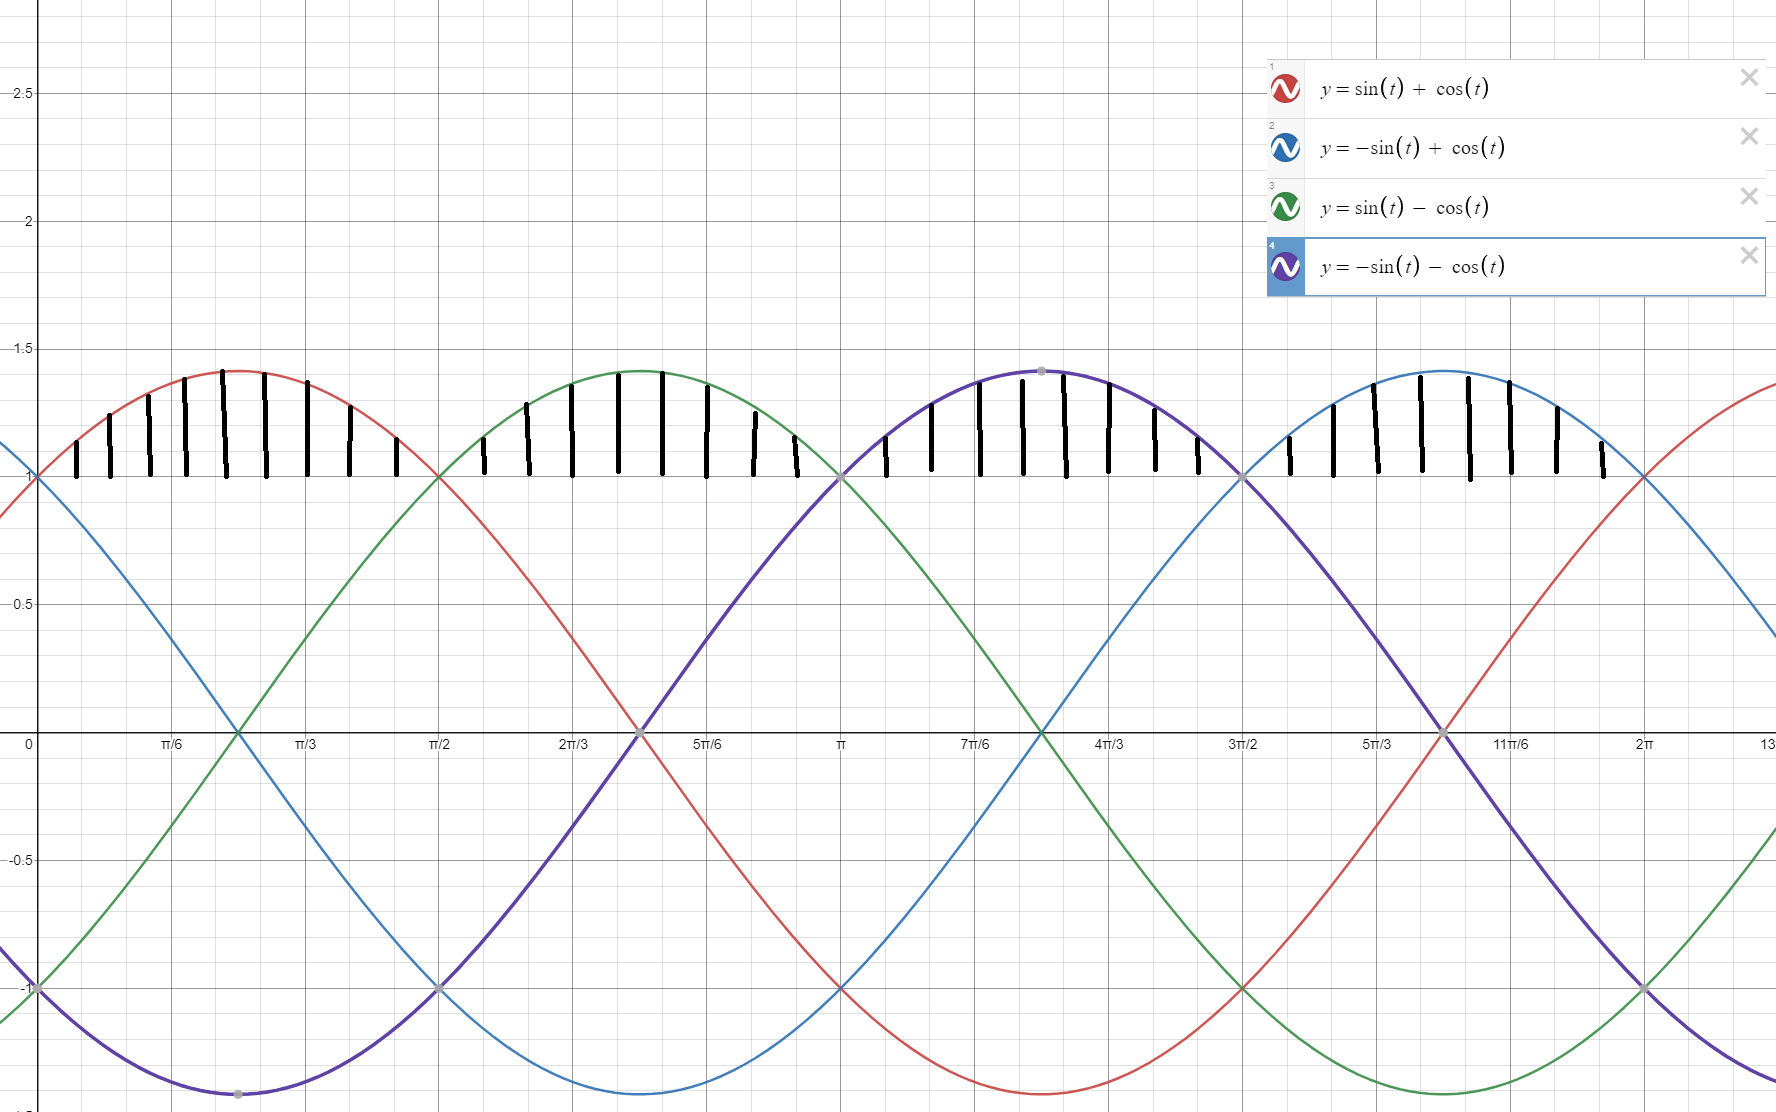

## Question 3a
The indicence matrix is constructed with nodes as rows and edges as columns. <br/>
This is the labeled matrix: <br/>
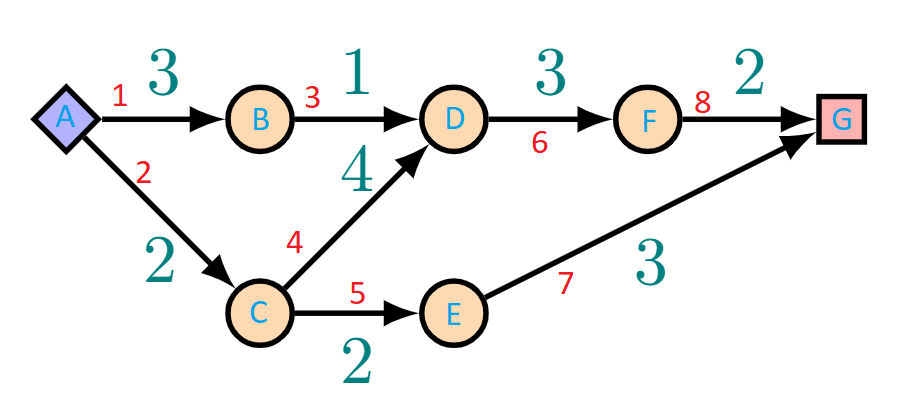

A = $\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
-1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 0 & -1 & -1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & -1\\
\end{bmatrix}$
$\quad$x = $\begin{bmatrix}
x_{ab}\\
x_{ac}\\
x_{bd}\\
x_{cd}\\
x_{ce}\\
x_{df}\\
x_{eg}\\
x_{fg}\\
\end{bmatrix}$
$\quad$p = $\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$
$\quad$q = $\begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\end{bmatrix}$

## Question 3b
A = $\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & -1\\
-1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 0 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & -1 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 1\\
\end{bmatrix}$
$\quad$c = $\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
1\\
\end{bmatrix}$
$\quad$x = $\begin{bmatrix}
x_{ab}\\
x_{ac}\\
x_{bd}\\
x_{cd}\\
x_{ce}\\
x_{df}\\
x_{eg}\\
x_{fg}\\
\end{bmatrix}$
$\quad$b = $\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$
$\quad$p = $\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$
$\quad$q = $\begin{bmatrix}
3\\
2\\
1\\
4\\
2\\
3\\
3\\
2\\
\end{bmatrix}$

## Question 3c
This min-cut (S-T cut) is: <br/>
S = {A, B} <\br/>
T = {C, D, E, F, G}
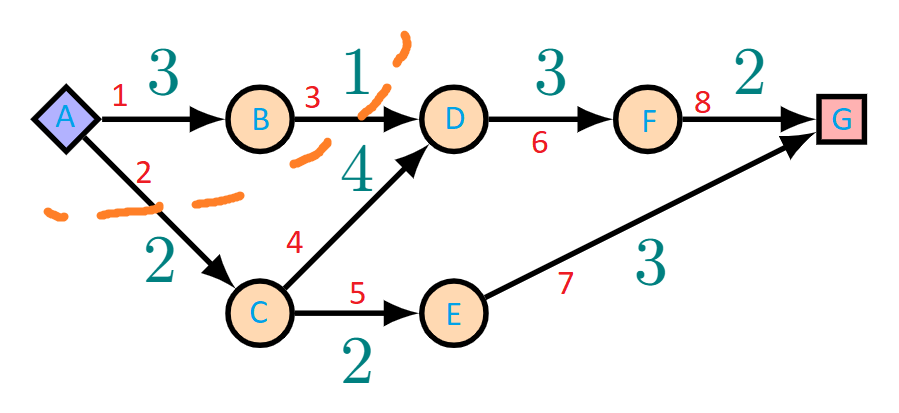